In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import matplotlib.image as mpimg

In [3]:
images_path = '/vagrant/imgs/images/img_align_celeba'
landmarks_path = '/vagrant/imgs/list_attr_celeba.csv'

In [4]:
def count():
    df = pd.read_csv(landmarks_path)
    output = []
    for index, row in df.iterrows():
        label = np.array(row.values.tolist()[1:])
        label[label < 0] = 0
        output.append(np.sum(label))
                
    return np.array(output)

In [5]:
def images(output, num):
    df = pd.read_csv(landmarks_path)
    rows = df.iloc[list(np.where(output==num)[0])]
    return rows

In [41]:
def get_headers():
    df = pd.read_csv(landmarks_path)
    headers = list(df)
    return headers[1:]

In [56]:
def collect_headers_string(rows):
    _headers = {}
    for index, row in rows.iterrows():
        row_as_list = row.tolist().index(1)
        index_list = [i for i, x in enumerate(row.tolist()) if x == 1]
        h = ', '.join([headers[i] for i in index_list])
        if h not in _headers:
            _headers[h] = 0
        _headers[h] += 1
    return _headers
        

In [44]:
def collect_headers(rows):
    _headers = {}
    for index, row in rows.iterrows():
        row_as_list = row.tolist().index(1)
        index_list = [i for i, x in enumerate(row.tolist()) if x == 1]
        h = [headers[i] for i in index_list]
        for item in h:
            if item not in _headers:
                _headers[item] = 0
            _headers[item] += 1
    return _headers

In [42]:
headers = get_headers()

In [ ]:
output = count()


In [71]:
rows = images(output, 1)
rows = rows.drop('image_id', axis=1)
rows[rows < 0] = 0
result = collect_headers(rows)


In [74]:
def plot_attributes(ones_, keys_, rotation='horizontal', ymin=0):
    n_groups = len(ones_)

    ones = tuple(ones_)

    fig, ax = plt.subplots(figsize=(15,10))

    index = np.arange(n_groups)
    bar_width = 0.2

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, ones, bar_width,
                    alpha=opacity, color='b',
                    label='Ones')



    ax.set_xlabel('Attribute')
    ax.set_ylabel('Count')
    ax.set_ylim(bottom=ymin)
    ax.set_title('Attribute Counts')
    ax.set_xticks(index + bar_width / 2)
    
    ax.set_xticklabels(tuple(keys_), rotation=rotation)
    ax.legend()

    # fig.tight_layout()
    plt.show()

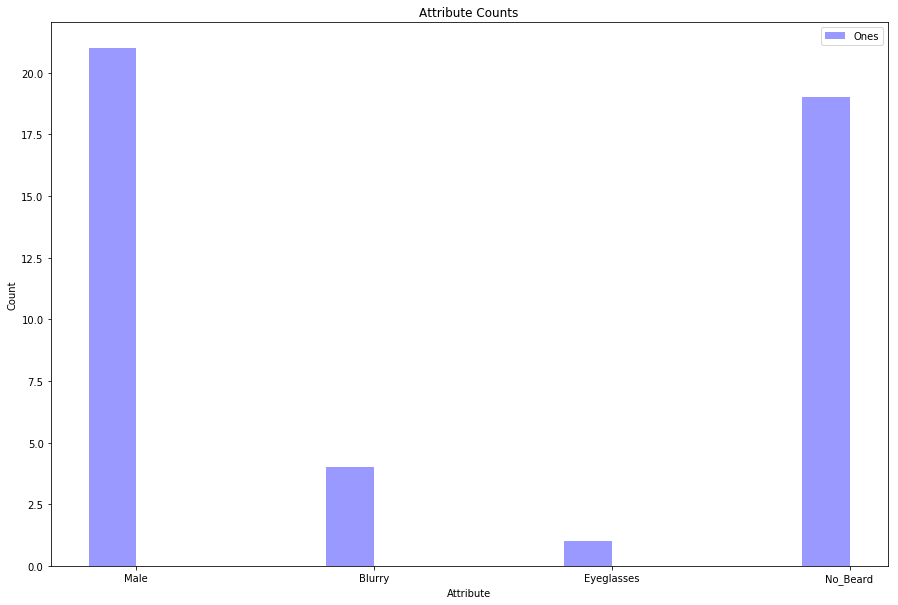

In [75]:
plot_attributes(result.values(), result.keys())

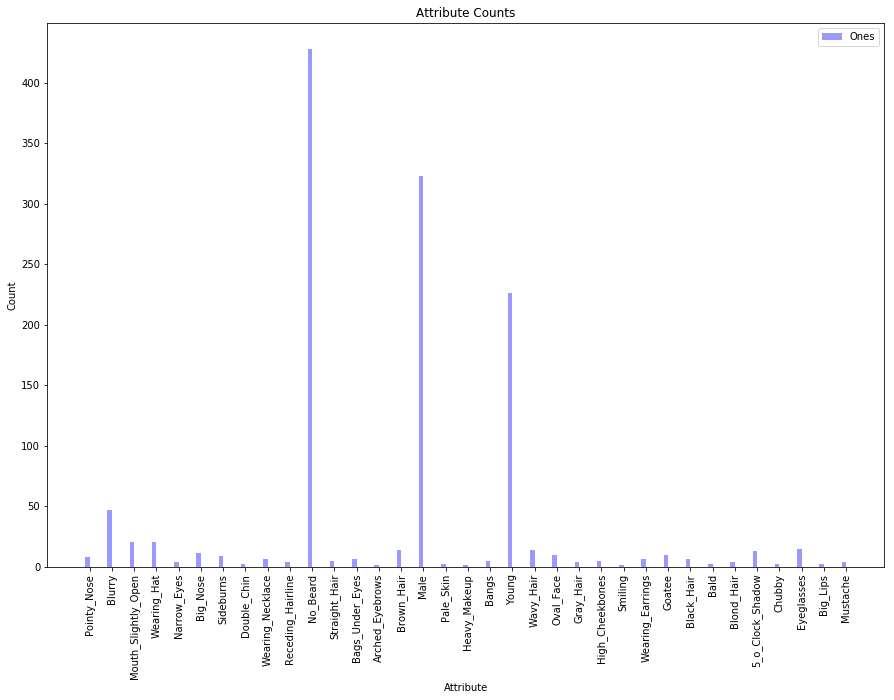

In [76]:
rows = images(output, 2)
rows = rows.drop('image_id', axis=1)
rows[rows < 0] = 0
result = collect_headers(rows)
plot_attributes(result.values(), result.keys(), 'vertical')

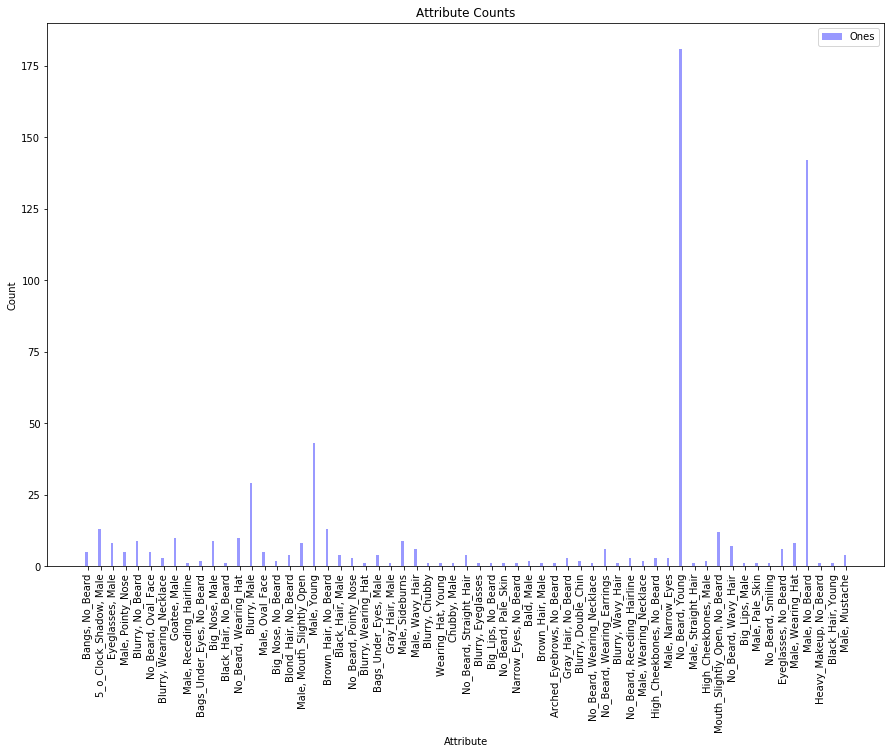

In [77]:
result = collect_headers_string(rows)
plot_attributes(result.values(), result.keys(), 'vertical')

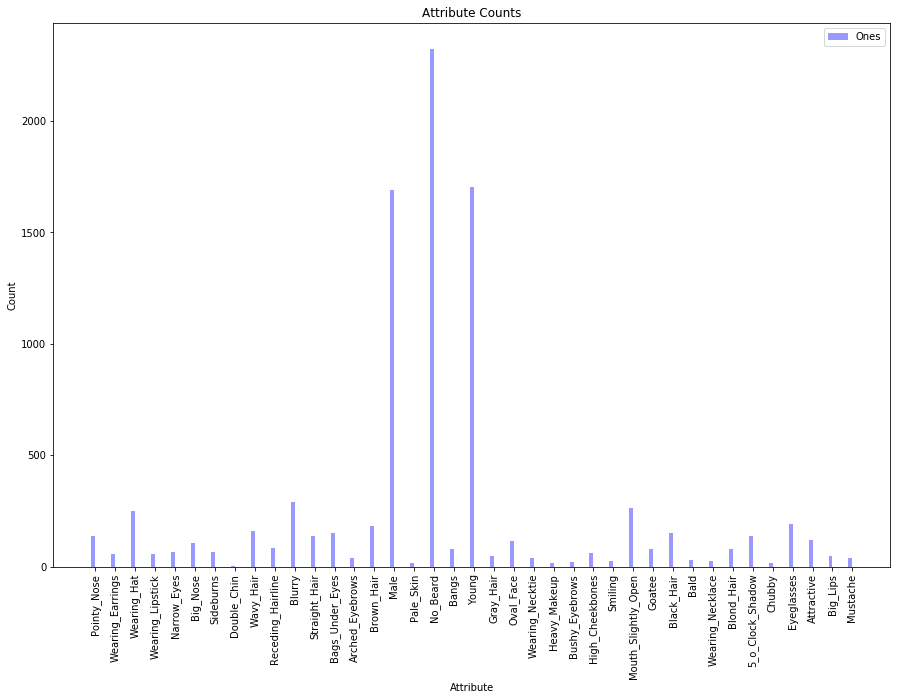

In [78]:
rows = images(output, 3)
rows = rows.drop('image_id', axis=1)
rows[rows < 0] = 0
result = collect_headers(rows)
plot_attributes(result.values(), result.keys(), 'vertical')


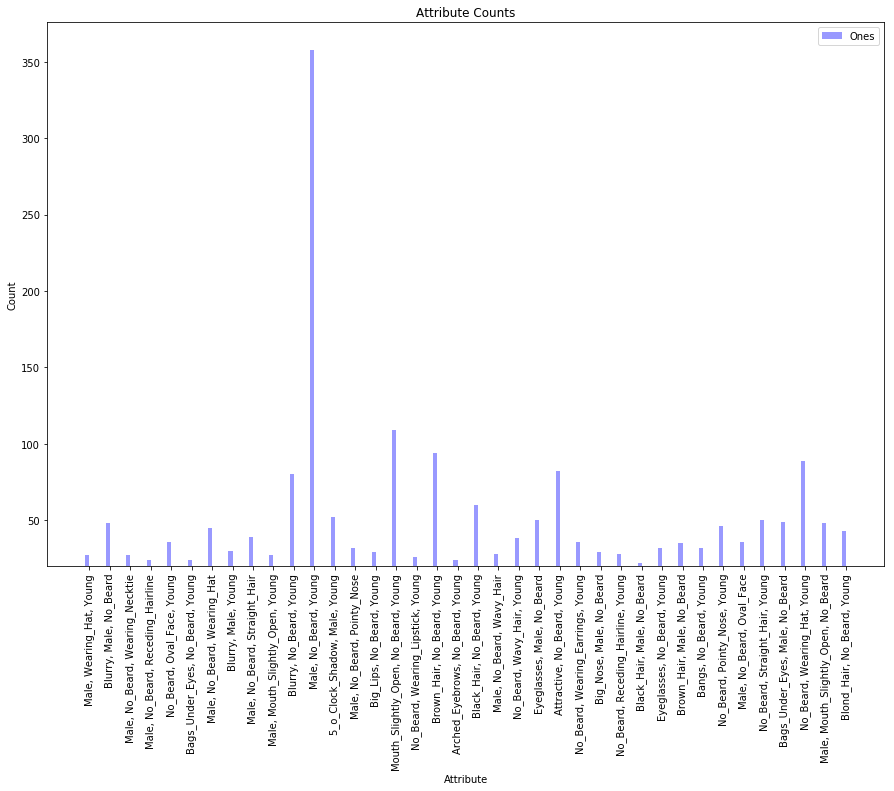

In [79]:
result = collect_headers_string(rows)
result = {k:v for k,v in result.items() if v > 20}
plot_attributes(result.values(), result.keys(), 'vertical', 20)

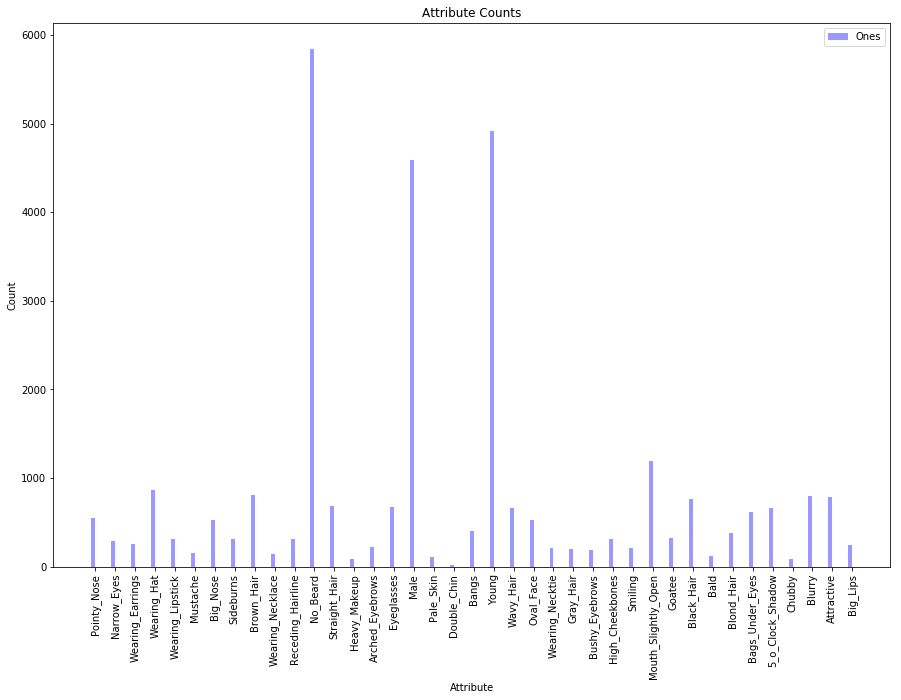

In [80]:
rows = images(output, 4)
rows = rows.drop('image_id', axis=1)
rows[rows < 0] = 0
result = collect_headers(rows)
plot_attributes(result.values(), result.keys(), 'vertical')

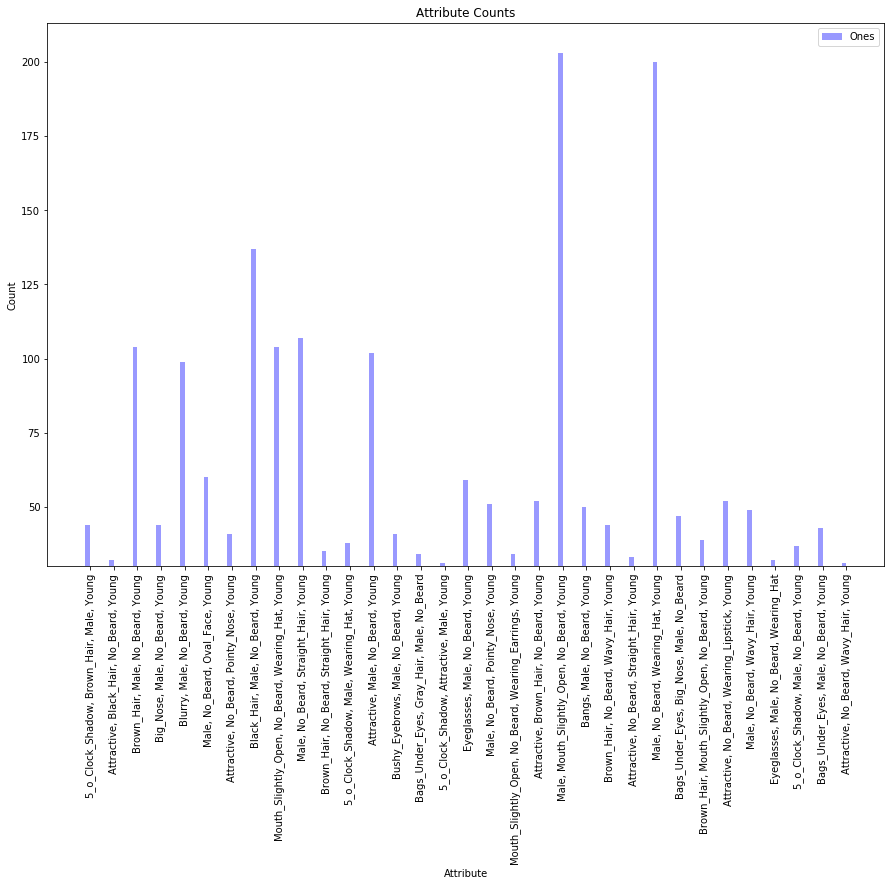

In [82]:
result = collect_headers_string(rows)
result = {k:v for k,v in result.items() if v > 30}
plot_attributes(result.values(), result.keys(), 'vertical', 30)

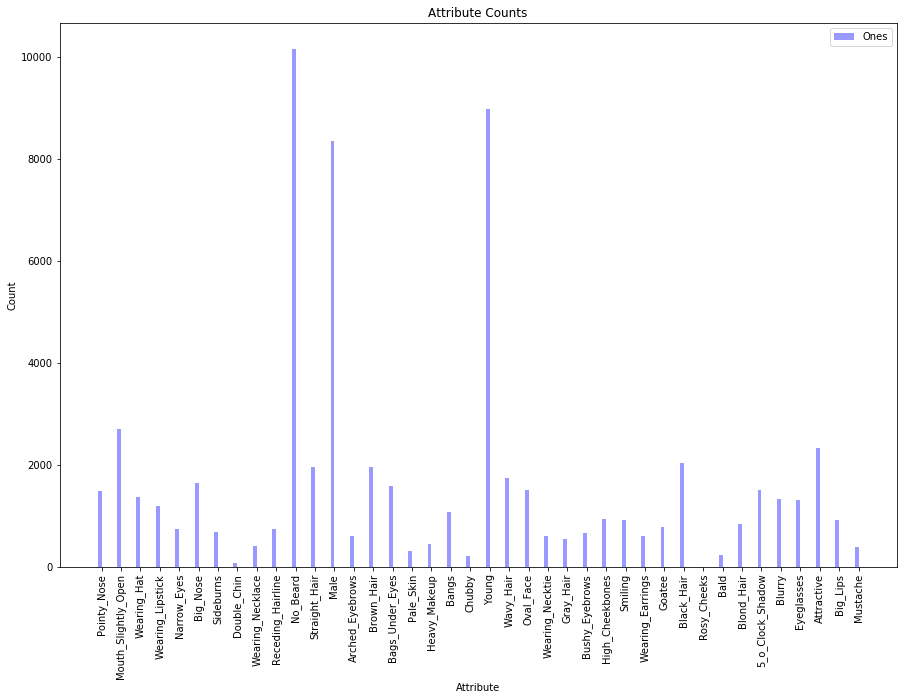

In [83]:
rows = images(output, 5)
rows = rows.drop('image_id', axis=1)
rows[rows < 0] = 0
result = collect_headers(rows)
plot_attributes(result.values(), result.keys(), 'vertical')

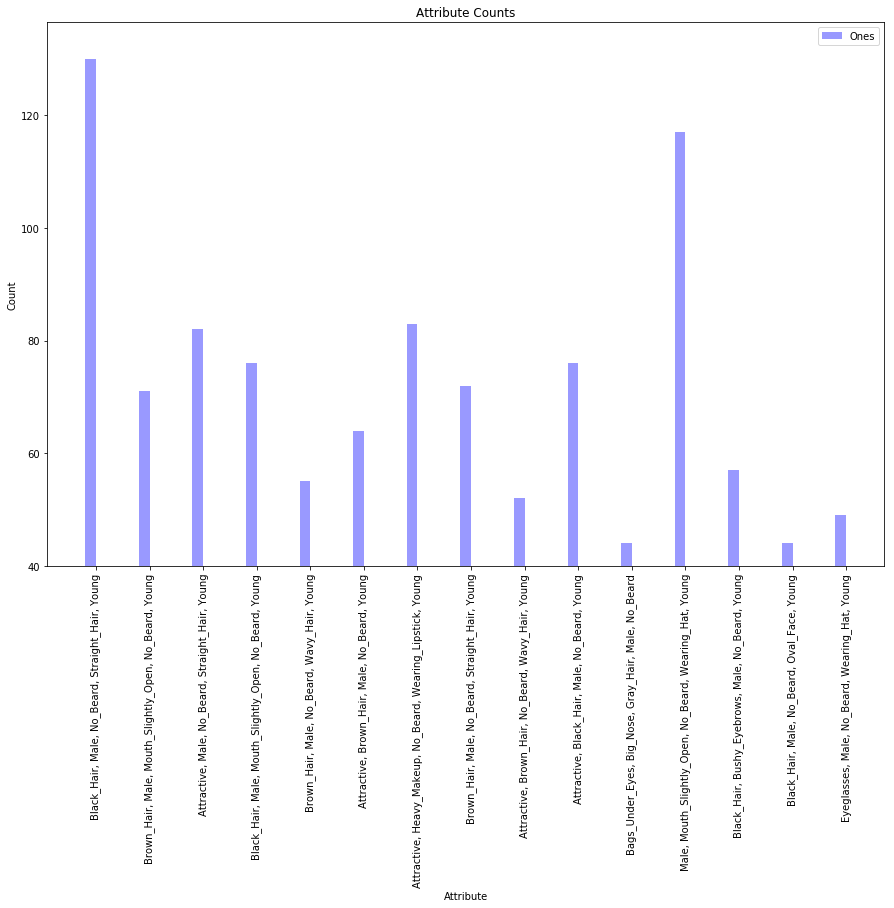

In [84]:
result = collect_headers_string(rows)
result = {k:v for k,v in result.items() if v > 40}
plot_attributes(result.values(), result.keys(), 'vertical', 40)

In [86]:
def collect_headers_list(rows):
    _headers = {}
    for index, row in rows.iterrows():
        row_as_list = row.tolist().index(1)
        index_list = [i for i, x in enumerate(row.tolist()) if x == 1]
        h_list = [headers[i] for i in index_list]
        h = ', '.join([headers[i] for i in index_list])
        if h not in _headers:
            _headers[h] = {
                "num": 0,
                "_list": h_list
            }
        _headers[h]['num'] += 1
    return _headers

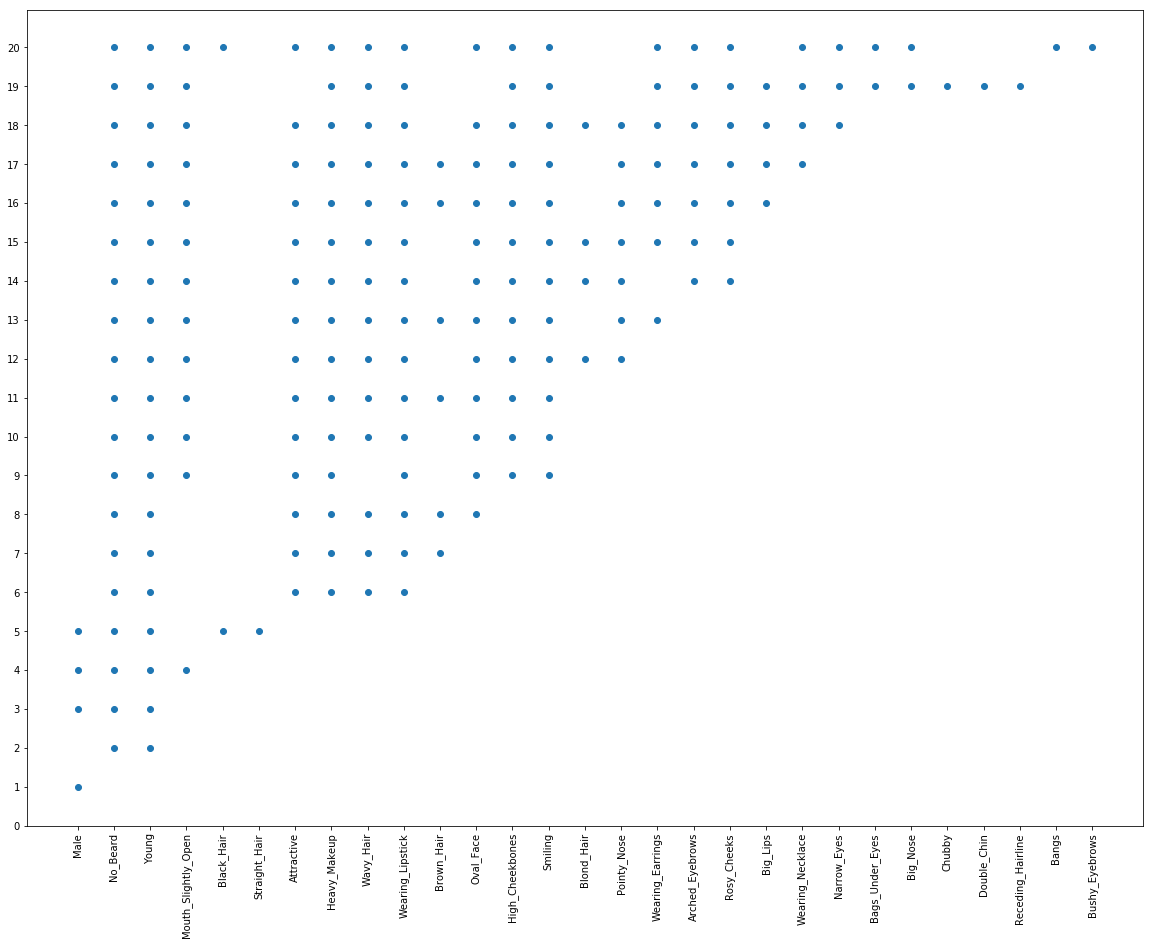

In [114]:
y = []
x = []
for i in range(1, 21):
    rows = images(output, i)
    rows = rows.drop('image_id', axis=1)
    rows[rows < 0] = 0
    result = collect_headers_list(rows)
#     keys = [result.keys()]
#     vals = [val['num'] for val in result.values()]
#     print(keys)
#     print(vals)
    tmp = 0
    highest = []
    for key in result:
        if result[key]['num'] > tmp:
            highest= result[key]['_list']
            tmp = result[key]['num']
#     highest_list = highest.split(', ')
    for item in highest:
        y.append(i)
        x.append(item)
fig, ax = plt.subplots(figsize=(20, 15))
# plt.figure()
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 21, 1))


plt.show()

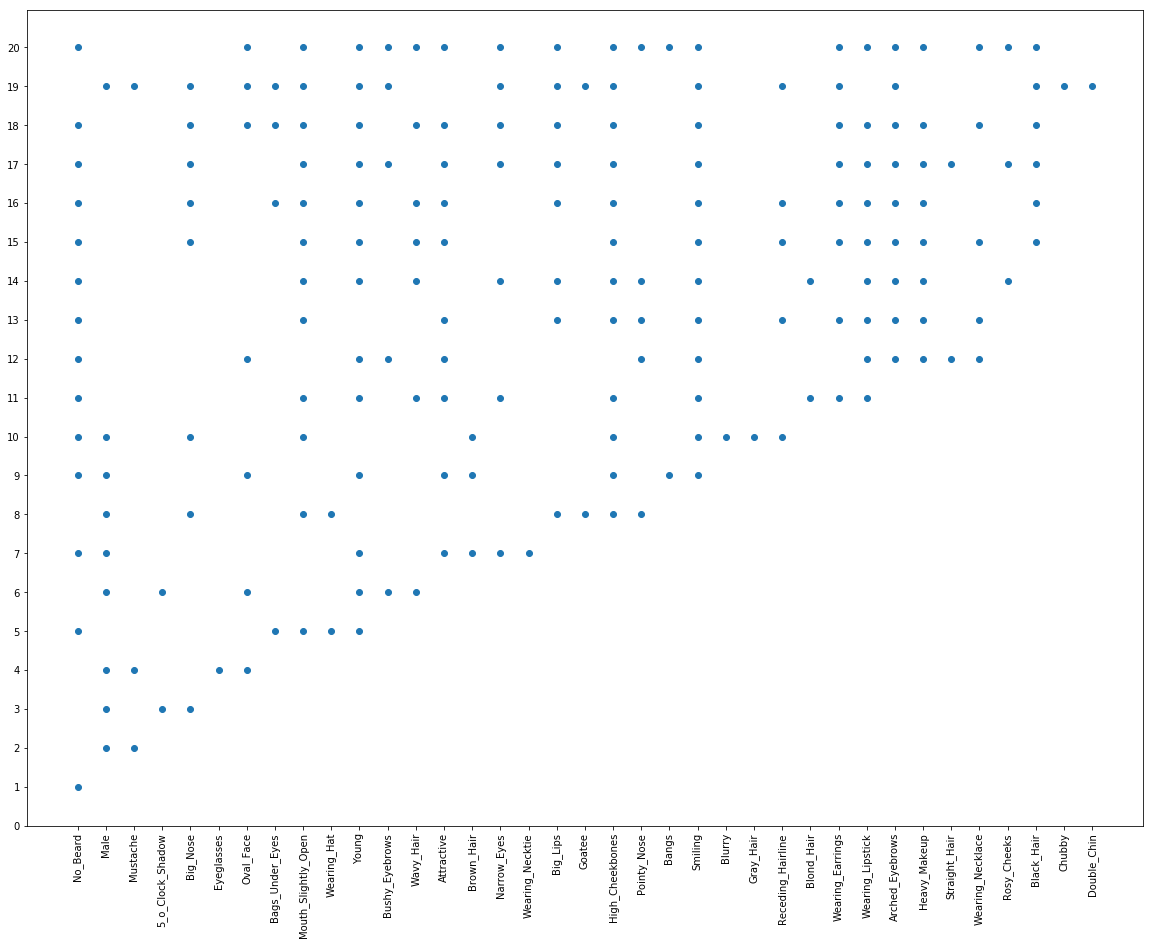

In [104]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(20, 15))
# plt.figure()
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 21, 1))


plt.show()